Sizlerden müşterilerin bir sonraki seyahetlerinde tercih edebilecekleri 5 – 7 arası öneri destinasyon 
tahmini beklenmektedir. Yolcuların öneri listesinde alternatif şehirlerin olmaması beklenmektedir. Buna 
ilişkin alternatif şehirlerin yer aldığı dosya sizlerle paylaşılmıştır.
Model sonucunda, Pazarlama ve Kampanya faaliyetlerinde kullanılmak üzere ayrılmasının anlamlı olacığını 
düşündüğünüz kriterlere göre model sonuç tablolarını oluşturabilirsiniz. Oluşan sonuçların kullanım 
senaryolarına ilişkin açıklama yapmanız beklenmektedir. 
Model oluşturulurken, mevsimselliğin de dikkate alınması beklenmedir. Veriler içeriği aşağıdaki gibidir.

COLUMN_NAME EXPLANATION SAMPLE

drops 
PRIM_TKT_NUM: Müşteri bilet numarasıdır 2,307,664,176
CITY_NM: Varış istasyonunun şehir adıdır ISTANBUL
CNTRY_NM: Varış istasyonunun ülke adıdır TURKEY
ORG_CITY_NM: Kalkış istasyonunun şehir adıdır ADIYAMAN
ORG_CNTRY_NM: Kalkış istasyonunun ülke adıdır TURKEY

gropby:
CUST_KEY: Müşteriye özel bir numaradır 2670242

SEG_LCL_DEP_DT: GMT saat türünden kalkış günü bilgisidir 4/16/2017 0:00

ORGN_AP: Kalkış istasyonunun airport kodudur ADF
DSTN_AP: Varış istasyonunun airport kodudur IST

DOM_INTNL_FLAG: Seyahatin yurtiçi, yurtdışı olduğunu gösterir (D:Domestic, I: International)
JRNY_TYP: Seyahatin tek yön mü, gidiş- dönüş mü olduğunu gösterir (O:One-Way, R: Return)
TOP1_ORG_MKT_REGN: Müşterinin en çok çıkış yaptığı şehrin Pazarlama birimince  tanımlanan Region bilgisini içerir - Domestic
TOP1_ORG_CTY: Müşterinin en çok çıkış yaptığı şehirdir SIVAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from collections import Counter

In [2]:
def find_transitions(df):
    
    flight_pairs = list(zip(df['ORG_CITY_NM'], df['CITY_NM']))
    pair_counts = Counter(flight_pairs)
    # all_cities = set(list(df['ORG_CITY_NM'].unique()) + list(df['CITY_NM'].unique()))
    shape = (len(all_cities_list), len(all_cities_list))
    
    transition_df = pd.DataFrame(np.zeros(shape),index=sorted(all_cities_list), columns=sorted(all_cities_list))
    
    for k, v in pair_counts.items():
        transition_df.loc[k[0], k[1]] = v
    
    return transition_df.div(transition_df.sum(axis=1)+0.0000001, axis=0)

In [3]:
def find_customer_transitions(cust_df):
    return find_transitions(cust_df)

In [4]:
def find_seasonal_transitions(df, season):
    seasonal_df = df[df['season']==season]
    return find_transitions(seasonal_df)

In [5]:
data_path = r'C:\Users\IsmailKaraman\workspace\thy\data\p1\BirSonrakiDestinasyonTahminlemeBase.csv'

seperator = '|'
col_list = ['CUST_KEY', 'SEG_LCL_DEP_DT', 'ORG_CITY_NM', 'CITY_NM', 'DOM_INTNL_FLAG', 'JRNY_TYP',
       'TOP1_ORG_MKT_REGN', 'TOP1_ORG_CTY']

dtypes = {'CUST_KEY': 'int32',
          'ORG_CITY_NM': 'category',
          'CITY_NM': 'category',
          'DOM_INTNL_FLAG': 'category',
          'JRNY_TYP': 'category',
          'TOP1_ORG_MKT_REGN': 'category',
          'TOP1_ORG_CTY': 'category'}
dates = ['SEG_LCL_DEP_DT']

## alternative cities

In [6]:
alt_cities_path = r'C:\Users\IsmailKaraman\workspace\thy\data\p1\AlternatifSehirler_BirSonrakiDestinasyonTahminleme.xlsx'

replace_for_alter_cities = {'ordu_giresun':'ordu-giresun',
                            'dar_es_salaam':'dar es salaam',
                            'dalaman_mugla':'dalaman (mugla)',
                            'tel_aviv':'tel aviv',
                            'sharm_el_sheikh':'sharm el-sheikh',
                            'abu_dhabi':'abu dhabi',
                           'basel_mulhouse':'basel/mulhouse',
                           'amasya___merzifon':'amasya/merzifon',
                           'balikesir_edremit':'balikesir edremit'}

alter_cities = pd.read_excel(alt_cities_path, usecols=['City_1', 'City_2'])

for col in alter_cities.columns:
    alter_cities[col] = alter_cities[col].str.lower()
alter_cities.replace(replace_for_alter_cities, inplace=True)

In [7]:
df = pd.read_csv(data_path, usecols=col_list, sep=seperator, parse_dates=dates, encoding='cp437', nrows=10000)

In [8]:
df.memory_usage().sum()/(1024*1024*1024)

0.000596165657043457

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CUST_KEY           10000 non-null  int64         
 1   SEG_LCL_DEP_DT     10000 non-null  datetime64[ns]
 2   CITY_NM            9994 non-null   object        
 3   ORG_CITY_NM        9997 non-null   object        
 4   DOM_INTNL_FLAG     10000 non-null  object        
 5   JRNY_TYP           9996 non-null   object        
 6   TOP1_ORG_MKT_REGN  9984 non-null   object        
 7   TOP1_ORG_CTY       9984 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 625.1+ KB


In [10]:
df.head(3)

,CUST_KEY,SEG_LCL_DEP_DT,CITY_NM,ORG_CITY_NM,DOM_INTNL_FLAG,JRNY_TYP,TOP1_ORG_MKT_REGN,TOP1_ORG_CTY
0,2670242,2017-06-24,ISTANBUL,SIVAS,D,O,Domestic,SIVAS
1,170285826,2019-05-21,TEL AVIV,MIAMI,I,R,America,MIAMI
2,171132805,2019-06-25,KUTAHYA,FRANKFURT,I,R,Central Europe,FRANKFURT


In [11]:
replace_for_errors= {'ADDS ABABA' : 'ADDIS ABABA',
                    'MOGADSHU' : 'MOGADISHU',
                    'SNOP' : 'SINOP',
                    'ABDJAN':'ABIDJAN',
                    'THESSALONK' : 'THESSALONIKI',
                    'SULEYMANAH' : 'SULEYMANIAH',
                    'HO CH MNH CTY (SAGON)' : 'HO CHI MINH CITY (SAIGON)',
                    'SHRAZ' : 'SHIRAZ',
                    'SHARM EL-SHEKH' : 'SHARM EL-SHEIKH',
                    'VALENCA' : 'VALENCIA',
                    'TURN(TORNO)' : 'TURIN(TORINO)',
                    'TEKRDAG' : 'TEKIRDAG',
                    'LEFKOA' : 'LEFKOSA',
                    'KLMANJARO' : 'KILIMANJARO',
                    'SRT' : 'SIIRT'}

df.replace(replace_for_errors, inplace=True)

In [12]:
for col in ['ORG_CITY_NM', 'CITY_NM', 'TOP1_ORG_MKT_REGN', 'TOP1_ORG_CTY']:
    df[col] = df[col].str.lower()

In [13]:
# dropping flights that have same arrival and departure city
df = df[df['ORG_CITY_NM']!=df['CITY_NM']]

In [14]:
# # of customers that has more than 1 flight
sum(df['CUST_KEY'].duplicated(False))

8026

In [15]:
df.shape

(9940, 8)

## eda

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CUST_KEY           9940 non-null   int64         
 1   SEG_LCL_DEP_DT     9940 non-null   datetime64[ns]
 2   CITY_NM            9934 non-null   object        
 3   ORG_CITY_NM        9937 non-null   object        
 4   DOM_INTNL_FLAG     9940 non-null   object        
 5   JRNY_TYP           9936 non-null   object        
 6   TOP1_ORG_MKT_REGN  9924 non-null   object        
 7   TOP1_ORG_CTY       9924 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 698.9+ KB


In [17]:
df.isna().sum()

CUST_KEY              0
SEG_LCL_DEP_DT        0
CITY_NM               6
ORG_CITY_NM           3
DOM_INTNL_FLAG        0
JRNY_TYP              4
TOP1_ORG_MKT_REGN    16
TOP1_ORG_CTY         16
dtype: int64

In [18]:
len(df['CUST_KEY'].unique())

3354

In [19]:
%%script False
import missingno as msgn
#read in data here
msgn.matrix(df,color=(0.45, 0.75, 0.25))

Couldn't find program: 'False'


In [20]:
df.dropna(subset=['CITY_NM', 'ORG_CITY_NM', 'TOP1_ORG_CTY'],inplace=True)

In [21]:
seasons = {'winter':[12,1,2], 
           'spring':[3,4,5], 
           'summer':[6,7,8],
           'fall':[9,10,11]}

season_mapping = {month:k for k,v in seasons.items() for month in v}
season_mapping

{12: 'winter',
 1: 'winter',
 2: 'winter',
 3: 'spring',
 4: 'spring',
 5: 'spring',
 6: 'summer',
 7: 'summer',
 8: 'summer',
 9: 'fall',
 10: 'fall',
 11: 'fall'}

In [22]:
df['season'] = df['SEG_LCL_DEP_DT'].apply(lambda x: season_mapping[x.month])

In [23]:
df.isna().sum()

CUST_KEY             0
SEG_LCL_DEP_DT       0
CITY_NM              0
ORG_CITY_NM          0
DOM_INTNL_FLAG       0
JRNY_TYP             0
TOP1_ORG_MKT_REGN    0
TOP1_ORG_CTY         0
season               0
dtype: int64

In [24]:
df.shape

(9917, 9)

In [25]:
# converting columns to corresponding column types
for k, v in dtypes.items():
    df[k] = df[k].astype(v)

In [26]:
# finding flight pairs as dep-arr
flight_pairs = list(zip(df['ORG_CITY_NM'],df['CITY_NM']))
# counting flight pairs
pair_counts = Counter(flight_pairs)
# top 10 flight pairs
sorted(pair_counts.items(), key=lambda pair: pair[1], reverse=True)[0:10]

[(('izmir', 'istanbul'), 294),
 (('istanbul', 'izmir'), 271),
 (('istanbul', 'ankara'), 259),
 (('ankara', 'istanbul'), 250),
 (('istanbul', 'antalya'), 217),
 (('trabzon', 'istanbul'), 175),
 (('istanbul', 'trabzon'), 173),
 (('antalya', 'istanbul'), 163),
 (('istanbul', 'adana'), 140),
 (('istanbul', 'bodrum'), 108)]

In [27]:
# finding all unique cities
all_cities_list = set(list(df['ORG_CITY_NM'].unique()) + list(df['CITY_NM'].unique()))

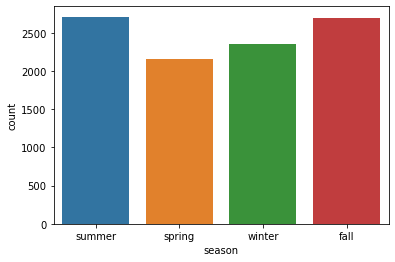

In [28]:
ax = sns.countplot(x="season", data=df)

## splitting data as train and test

In [31]:
# grouping customers to find latest flights of each customer to split as test data
grouped_df = df.sort_values(by=['CUST_KEY', 'SEG_LCL_DEP_DT']).groupby(by='CUST_KEY')
test_indexes = grouped_df['SEG_LCL_DEP_DT'].idxmax()

In [32]:
# customers who has 1 flights used as test

# flights of the customers who have only one flight
test_df1 = df.drop_duplicates(subset=['CUST_KEY'], keep=False)

df = df[df['CUST_KEY'].duplicated(False)]

# last flights of the customers who have more than one flight
test_df2 = df.loc[test_indexes]

train_df = df.drop(test_indexes)

In [33]:
%%script False
# use this for graph
count_by_days = df.groupby(by='SEG_LCL_DEP_DT').count()
ax = count_by_days.plot( y='CUST_KEY', figsize=(12,6))

Couldn't find program: 'False'


In [34]:
general_transitions = find_transitions(train_df)
seasonal_transitions_summer = find_seasonal_transitions(train_df, 'summer')
seasonal_transitions_winter = find_seasonal_transitions(train_df, 'winter')
seasonal_transitions_spring = find_seasonal_transitions(train_df, 'spring')
seasonal_transitions_fall = find_seasonal_transitions(train_df, 'fall')

seasonal_transitions = {'summer':seasonal_transitions_summer,
                        'winter':seasonal_transitions_winter,
                        'spring':seasonal_transitions_spring,
                        'fall':seasonal_transitions_fall}

In [35]:
def add_dataframes(general_df, seasonal_df, customer_df):
    
    tmp_df = pd.DataFrame(np.zeros(general_df.shape), 
                          columns=general_df.columns, index=general_df.index)
    seasonal_df = seasonal_df.add(tmp_df, fill_value=0.0)
    customer_df = customer_df.add(tmp_df, fill_value=0.0)
    
    return general_df + seasonal_df + customer_df

In [36]:
def find_cust_seasonal_transitions(cust_df):
    
    seasonal_cust_transitions = {}
    for season in seasons.keys():
        seasonal_cust_transitions[season] = find_seasonal_transitions(cust_df, season)
        
    return seasonal_cust_transitions

In [95]:
def predict(row, pred_dep='origin', season=None, n_pred=7, pred_type='only_cities', filter_alternate=True):
    """
    Parameters:
    -----------
    row: Series
        Data point to be predicted
        
    pred_dep: {'origin', 'top_city'}, default 'origin'
        Which city will be used for predicting the next flight. 
        'origin' refers to using test flight's origin city.
        'top_city' refers to using 'TOP1_ORG_CTY' of the customer.
        
    season: {None, 'winter', 'summer', 'spring', 'fall'}, default None
        Season param for using seasonal transition matrix. 
        None refers to using test flight's season
        
    n_pred: int, default 7
        Number of cities that model suggest to the customer.
        
    pred_type: {'only_cities', 'with_probs'}, default 'only_cities'
        'only_cities': returns only the top predicted cities
        'with_probs': returns predictions with probabilities
    
    filter_alternate: {True, False}, default True
        filters alternative cities from suggestions
    Returns:
    --------
    final_preds: dict or list
        if pred_type param is 'only_cities' it returns only predicted cities (list)
        if pred_type param is 'with_probs' it returns predicted cities with probabilities (dict)
        
    """
    
    
    cust_key = row['CUST_KEY']
    cust_df = train_df[train_df['CUST_KEY']==cust_key]
    
    # customer transitions
    cust_transitions = find_customer_transitions(cust_df)
    # seasonal customer transitions
    cust_seasonal_transitions = find_cust_seasonal_transitions(cust_df)
    
    # weights
    w1 = 1
    w2 = len(cust_df)
    w3 = 2*w2
    total_sum = (w1+w2+w3)
    w1 = w1/total_sum
    w2 = w2/total_sum
    w3 = w3/total_sum
    
    if season==None:
        season = row['season']
    if pred_dep == 'origin':
        departure = row['ORG_CITY_NM']
    elif pred_dep == 'top_city':
        departure = row['TOP1_ORG_CTY']
    else:
        print('Season param is wrong!')
        
    final_transitions = add_dataframes(w1*general_transitions, w2*seasonal_transitions[season], 
                                       w3*cust_seasonal_transitions[season])
    # final_prob = final_transitions.loc[row['TOP1_ORG_CTY']] ORG_CITY_NM
    # return final_transitions.loc[row['TOP1_ORG_CTY'].values[0]].sort_values(ascending=False)[0:n_pred]
    
    preds = final_transitions.loc[departure].sort_values(ascending=False)[0:n_pred]
    
    if filter_alternate:
        
        intrsctns = set(preds.index).intersection(set(alter_cities['City_1']))
        
        if intrsctns:
            commons = alter_cities[alter_cities['City_1'].isin(intrsctns)]['City_2'].values
            rmv = set(preds.index).intersection(set(commons))
            if rmv:
                preds = preds.drop(rmv)
    
    if len(preds) >= 5:
        final_preds = preds.copy()
    else:
        return 'not enough'
    
    if pred_type == 'only_cities':
        return list(final_preds.index.values)
    elif pred_type == 'with_probs':
        return dict(final_preds)
    else:
        print('Wrong return type!')

In [96]:
import time
now = time.time()
res = test_df2.apply(predict, axis=1, pred_type='only_cities', filter_alternate=False)
print(time.time()-now)

26.889870643615723


In [ ]:
len_ = 0
while len_ < n_pred:
    

In [ ]:
alter_cities

In [ ]:
results_2 = test_df2[test_df2['CUST_KEY']<350000].apply(predict, axis=1, pred_type='only_cities')

In [ ]:
results_2

In [ ]:
s

In [ ]:
results_1 = test_df1.apply(predict, axis=1, pred_type='only_cities')

In [ ]:
results = test_df2.apply(predict, axis=1)

In [ ]:
+split data as train - test
    train data - first n-1 flights of customers that has at least 2 flights
    test data - customers that has only 1 flight and last flights of customer who has at least 2 flights
+find seasons for each date


write a function that predicts next 5-7 flights:
    
    args: customer_flights, general_flights, season, seasonal_flights
    return: predictions with probabilities
    
    find general probabilities
    find seasonal transition probabilities
    find customer based transitions
    find new transition matrix using below formula
    get max 5-7 probabilities according to seasons
    

    

    


# solution
x1: general
x2: customer based
x3: seasonality based
    
x1*w1 + x2*w2 + x3*w3
w1 = 1 
w2: flight number
w3: seasonality weight

normalize as w1 + w2 + w3 = 1
optimise w1, w2, w3

def predict(cust_no):
    
    
    

In [ ]:
3. test case'i

fazla sayıda uçuşu olan müşterilerin son 5-10 uçuşunu tahmin etme

In [ ]:
simple markov model
https://github.com/ashwinmj/word-prediction/blob/master/MarkovModel.ipynb

viterbi
https://www.kaggle.com/friedchips/the-viterbi-algorithm-a-complete-solution
    
    
next destination 5-7
can we guess these from next destination's next destination